<a href="https://colab.research.google.com/github/ThatiFlowers/Amigo-Secreto-Challenge/blob/main/TelecomX_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extração de dados:

In [83]:
import pandas as pd
import requests
import numpy as np
import json
# JSON (em formato raw)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"


response = requests.get(url)
data = response.json()

# JSON em DataFrame
df = pd.DataFrame(data)

print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [84]:
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [85]:
print(df.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [86]:
print(df.describe())

        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq                                              3495   

                                                 internet  \
count                                                7267   
unique                                                129   
top     {'InternetService': 'No', 'OnlineSecurity': 'N...   
freq                                                 1581   

       

In [87]:
print("Valores ausentes por coluna:")
print(df.isnull().sum())

Valores ausentes por coluna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [88]:
print("\nValores únicos em colunas categóricas:")
for col in ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    if col in df.columns: # Verificar se a coluna existe despois de normalizar
        print(f"- {col}: {df[col].unique()}")


Valores únicos em colunas categóricas:
- Churn: ['No' 'Yes' '']


In [89]:
df['Churn'] = df['Churn'].replace('', 'No')

print("\nValores únicos da coluna Churn depois da limpeza:")
print(df['Churn'].unique())


Valores únicos da coluna Churn depois da limpeza:
['No' 'Yes']


In [90]:
# URL del archivo JSON (en formato raw)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Obtener datos desde el enlace
response = requests.get(url)
data = response.json()

# Convertir el JSON en un DataFrame
df = pd.DataFrame(data)

# Normalizar las columnas anidadas
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])


# Unir las columnas normalizadas al DataFrame original
df = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)

# Eliminar las columnas originales anidadas
df = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)

print(df.nunique())

customerID          7267
Churn                  3
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Monthly     1585
Charges.Total       6531
dtype: int64


In [91]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)


df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])


df = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)

df = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)

# Limpar a coluna 'Churn'
df['Churn'] = df['Churn'].replace('', 'No')

df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')


print(df['Charges.Total'].isnull().sum())

11


In [92]:
print(df.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [93]:
url=('/content/TelecomX_dicionario.md')

In [94]:
df = df[df['Charges.Total'].notnull()]

In [95]:
# 3. Exibe o resultado
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
dados = pd.read_json(url)

dados.rename(columns={
  'customerID': 'ID_Cliente',
    'Churn': 'Cancelamento',
    'customer/gender': 'Gênero',
    'customer/SeniorCitizen': 'Idoso',
    'customer/Partner': 'Possui_Companheiro',
    'customer/Dependents': 'Possui_Dependentes',
    'customer/tenure': 'Meses_de_Contrato',
    'phone/PhoneService': 'Telefone_Ativo',
    'phone/MultipleLines': 'Multiplas_Linhas',
    'internet/InternetService': 'Tipo_Internet',
    'internet/OnlineSecurity': 'Seguranca_Online',
    'internet/OnlineBackup': 'Backup_Online',
    'internet/DeviceProtection': 'Protecao_Dispositivo',
    'internet/TechSupport': 'Suporte_Tecnico',
    'internet/StreamingTV': 'Streaming_TV',
    'internet/StreamingMovies': 'Streaming_Filmes',
    'account/Contract': 'Tipo_Contrato',
    'account/PaperlessBilling': 'Fatura_Digital',
    'account/PaymentMethod': 'Forma_Pagamento',
    'account/Charges/Monthly': 'Valor_Mensal',
    'account/Charges/Total': 'Valor_Total',
    'tempo_estimado_meses': 'Meses_Estimados',
    'Conta_Diarias': 'Conta_Diaria'}
    , inplace=True)

print(dados.columns)
dados.head()

Index(['ID_Cliente', 'Cancelamento', 'customer', 'phone', 'internet',
       'account'],
      dtype='object')


,ID_Cliente,Cancelamento,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [96]:
linhas, colunas = dados.shape
print(f"\nO DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.")





O DataFrame possui 7256 linhas e 21 colunas.


In [97]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID_Cliente    7267 non-null   object
 1   Cancelamento  7267 non-null   object
 2   customer      7267 non-null   object
 3   phone         7267 non-null   object
 4   internet      7267 non-null   object
 5   account       7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [98]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df= pd.read_json(url)
df= requests.get(url)

In [99]:
resultado = json.loads(df.text)

In [100]:
df_n = pd.json_normalize(resultado,sep='_')

In [101]:
df_Telecom= pd.DataFrame(df_n)

In [102]:
df_Telecom = df_Telecom.drop_duplicates()

In [103]:
df_Telecom.tail(10)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
7257,9975-SKRNR,No,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.9
7258,9978-HYCIN,No,Male,1,Yes,Yes,47,Yes,No,Fiber optic,...,Yes,No,No,Yes,No,One year,Yes,Bank transfer (automatic),84.95,4018.05
7259,9979-RGMZT,No,Female,0,No,No,7,Yes,No,Fiber optic,...,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,94.05,633.45
7260,9985-MWVIX,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15
7261,9986-BONCE,Yes,Female,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.5
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


Transformação:

In [104]:
df_Telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [105]:
df_Telecom.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [106]:
pd.unique(df_Telecom['customerID'])

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [107]:
import numpy as np

In [108]:
df_Telecom['account_Contract'] = df_Telecom['account_Contract'].str.replace('-', ' ', regex=True)

In [109]:
df_Telecom['account_PaymentMethod'] = df_Telecom['account_PaymentMethod'].str.replace('(automatic)', '', regex=True)

In [110]:
df_Telecom['account_PaymentMethod'] = df_Telecom['account_PaymentMethod'].str.replace('[()]', '', regex=True)


In [111]:
df_Telecom['account_Charges_Total'] = df_Telecom['account_Charges_Total'].apply(lambda x: x.replace(' ', '').replace(',', '.').strip())


In [112]:
df_Telecom['account_Charges_Total'] = df_Telecom['account_Charges_Total'].replace('', '0')

In [113]:
df_Telecom['account_Charges_Total']= df_Telecom['account_Charges_Total'].astype(np.float64)

In [114]:
numericos = ['customer_tenure', 'customer_SeniorCitizen']
df_Telecom[numericos]= df_Telecom[numericos].astype(np.int64)


In [115]:
df_Telecom.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40


In [116]:
df_Telecom['Contas_Diarias'] = df_Telecom['account_Charges_Monthly']/30

In [117]:
df_Telecom.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40,2.796667


Análise dos dados:

In [118]:
df_Telecom.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035,2.157337
std,0.369074,24.571773,30.129572,2268.648587,1.004319
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,70.300000,1389.200000,2.343333
75%,0.000000,55.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [119]:
import matplotlib.pyplot as plt

In [120]:
df_evasão =df_Telecom.groupby('Churn')[['customerID']].count()

In [121]:
Total_Clientes = df_evasão['customerID'].sum()

In [122]:
df_evasão['Porcentagem'] = round((df_evasão['customerID']/Total_Clientes)*100)

In [123]:
df_evasão = df_evasão.query('Churn == "Yes" | Churn == "No"')


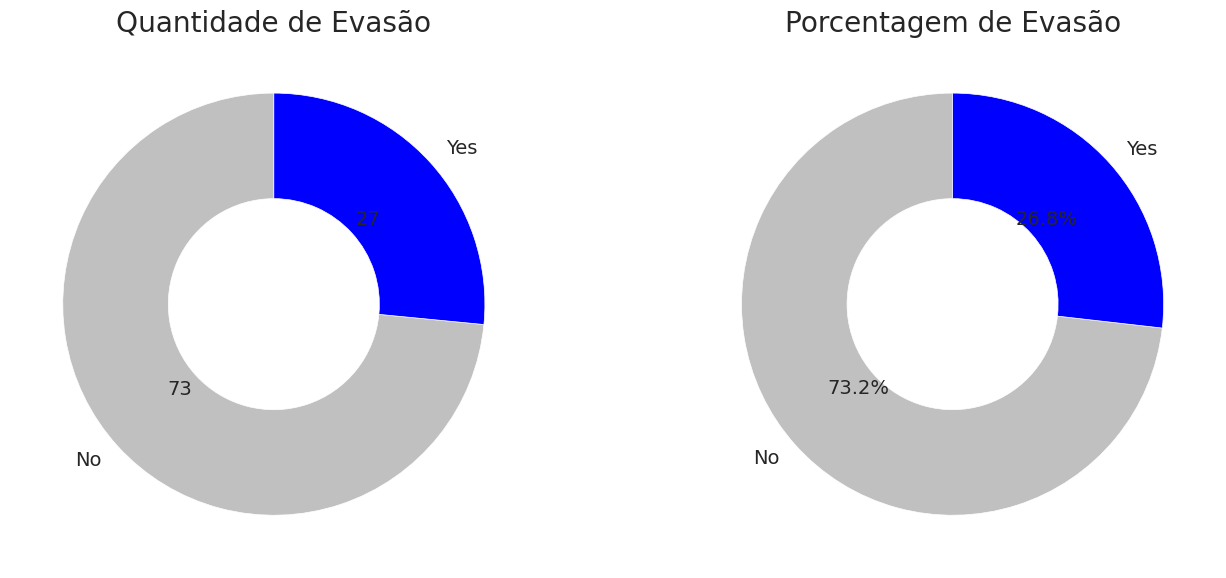

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.subplots_adjust(wspace=0.4)

cores = ['silver', 'blue']

axs[0].pie(
    df_evasão['customerID'],
    labels=df_evasão.index,
    autopct='%1.0f',
    startangle=90,
    colors=cores,
    wedgeprops={'width': 0.5}
)
axs[0].set_title('Quantidade de Evasão')

axs[1].pie(
    df_evasão['Porcentagem'],
    labels=df_evasão.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
    wedgeprops={'width': 0.5}
)
axs[1].set_title('Porcentagem de Evasão')

plt.tight_layout()
plt.show()

In [125]:
df_Evasão_Categorias =df_Telecom.groupby(['Churn','account_Contract', 'account_PaymentMethod'])[['customerID']].count()

In [126]:
df_Evasão_Categorias = df_Evasão_Categorias.query('Churn == "Yes" | Churn == "No"')

In [127]:
df_Evasão_Categorias = df_Evasão_Categorias.reset_index()

In [128]:
df_Evasão_Categorias.head()

,Churn,account_Contract,account_PaymentMethod,customerID
0,No,Month to month,Bank transfer,388
1,No,Month to month,Credit card,365
2,No,Month to month,Electronic check,856
3,No,Month to month,Mailed check,611
4,No,One year,Bank transfer,353


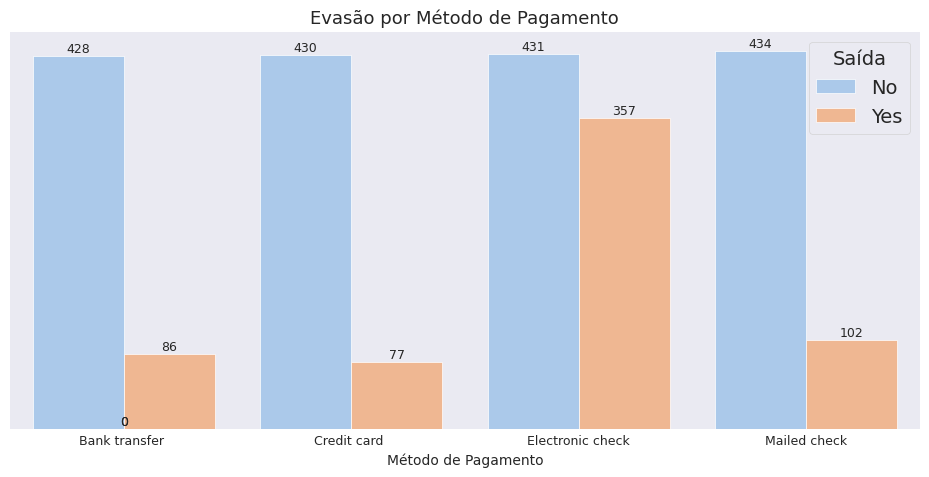

In [129]:
#gráfico de barras
import seaborn as sns
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')
sns.set_style("darkgrid")

ax = sns.barplot(data=df_Evasão_Categorias, x='account_PaymentMethod', y='customerID', hue='Churn', errorbar=None, palette= 'pastel')

plt.title('Evasão por Método de Pagamento', fontsize=13)
plt.xlabel('Método de Pagamento', fontsize =10)
plt.ylabel('Número de Clientes', fontsize =10)
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)
plt.legend(title='Saída')
plt.tight_layout()
ax.spines['top'].set_visible(False) #tirar a borda superior
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 1,
        f'{int(altura)}',
        ha='center', va='bottom', fontsize=9
    )
    ax.get_yaxis().set_visible(False)


plt.show()

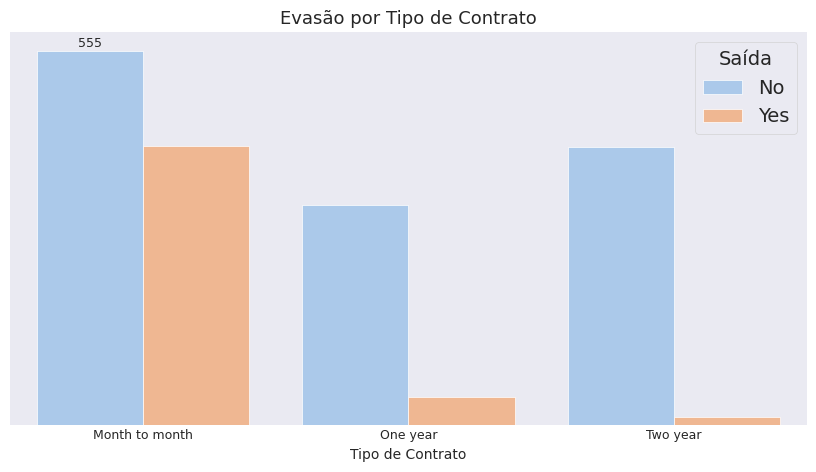

In [130]:
import seaborn as sns
plt.figure(figsize=(9,5))
sns.set_style("darkgrid")

ax = sns.barplot(data=df_Evasão_Categorias, x='account_Contract', y='customerID', hue='Churn', errorbar=None, palette='pastel')

plt.title('Evasão por Tipo de Contrato', fontsize=13)
plt.xlabel('Tipo de Contrato',fontsize=10)
plt.ylabel('Número de Clientes', fontsize=10)
plt.legend(title='Saída')
plt.tight_layout()
ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)
ax.spines['top'].set_visible(False) #tirar a borda superior
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 1,
        f'{int(altura)}',
        ha='center', va='bottom', fontsize=9
    )
    ax.get_yaxis().set_visible(False)

    plt.show()



In [131]:
df_Evasão_Idade =df_Telecom.groupby(['Churn','customer_SeniorCitizen'])[['customerID']].count()

In [132]:
df_Evasão_Idade = df_Evasão_Idade.query('Churn == "Yes" | Churn == "No"')

In [133]:
df_Evasão_Idade = df_Evasão_Idade.reset_index()

In [134]:
df_Evasão_Idade['customer_SeniorCitizen'] = df_Evasão_Idade['customer_SeniorCitizen'].apply(lambda x: 'Idoso' if x == 1 else 'Não Idoso')

In [135]:
df_Evasão_Idade

,Churn,customer_SeniorCitizen,customerID
0,No,Não Idoso,4508
1,No,Idoso,666
2,Yes,Não Idoso,1393
3,Yes,Idoso,476


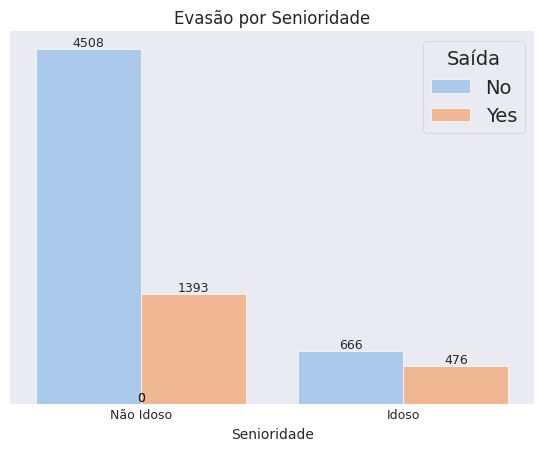

In [136]:


sns.set_style("darkgrid")

ax = sns.barplot(data=df_Evasão_Idade, x='customer_SeniorCitizen', y='customerID', hue='Churn', errorbar=None, palette='pastel')

plt.title('Evasão por Senioridade', fontsize=12)
plt.xlabel('Senioridade',fontsize=10)
plt.ylabel('Número de Clientes', fontsize=10)
plt.legend(title='Saída')
plt.tight_layout()

ax.xaxis.set_tick_params(labelsize=9)
ax.yaxis.set_tick_params(labelsize=9)
ax.spines['top'].set_visible(False) #tirar a borda superior
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for barra in ax.patches:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width()/2,
        altura + 1,
        f'{int(altura)}',
        ha='center', va='bottom', fontsize=9
    )
    ax.get_yaxis().set_visible(False)


plt.show()

In [137]:
df_Evasão_Total =df_Telecom.groupby(['Churn','account_Charges_Total','customer_tenure'])[['customerID']].count()


In [138]:
df_Evasão_Total = df_Evasão_Total.query('Churn == "Yes" | Churn == "No"')

In [139]:
df_Evasão_Total = df_Evasão_Total.reset_index()

In [140]:
df_Evasão_Total

,Churn,account_Charges_Total,customer_tenure,customerID
0,No,0.00,0,11
1,No,18.80,1,1
2,No,18.85,1,1
3,No,18.90,1,1
4,No,19.00,1,1
...,...,...,...,...
6826,Yes,7856.00,68,1
6827,Yes,7968.85,70,1
6828,Yes,8109.80,72,1
6829,Yes,8127.60,70,1


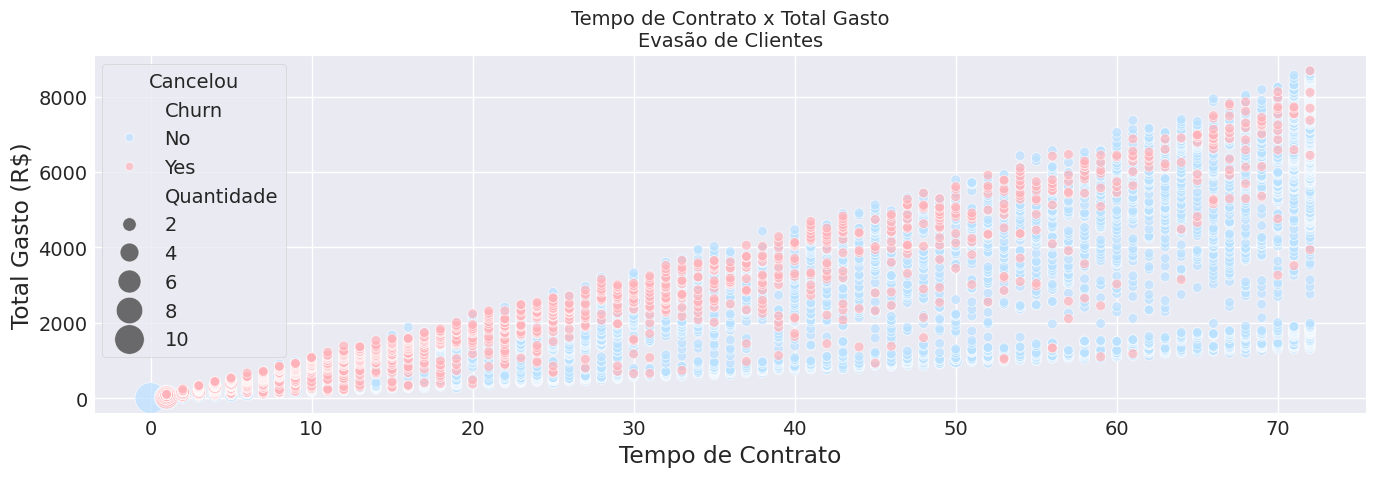

In [141]:
df_Evasão_Total.rename(columns={'customerID': 'Quantidade'}, inplace=True)

palette = {'Yes': '#FFB3BA', 'No': '#BAE1FF'}
plt.figure(figsize=(14, 5))
sns.set_style("darkgrid")

sns.scatterplot(
    data=df_Evasão_Total,
    x='customer_tenure',
    y='account_Charges_Total',
    size='Quantidade',
    hue='Churn',
    sizes=(50, 500),     # Escala dos tamanhos dos pontos
    alpha=0.7,
    palette=palette
)

plt.title('Tempo de Contrato x Total Gasto\nEvasão de Clientes', fontsize=14)
plt.xlabel('Tempo de Contrato')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Cancelou')
plt.tight_layout()

plt.show()

In [142]:
df_Telecom.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.9,267.40,2.796667


In [143]:
df_Evasão_diaria =df_Telecom.groupby(['Churn','Contas_Diarias','account_Charges_Monthly'])[['customerID']].count()

In [144]:
df_Evasão_diaria = df_Evasão_diaria.query('Churn == "Yes" | Churn == "No"')

In [145]:
df_Evasão_diaria = df_Evasão_diaria.reset_index()

In [146]:
df_Evasão_diaria


,Churn,Contas_Diarias,account_Charges_Monthly,customerID
0,No,0.608333,18.25,1
1,No,0.613333,18.40,1
2,No,0.618333,18.55,1
3,No,0.623333,18.70,2
4,No,0.625000,18.75,1
...,...,...,...,...
2365,Yes,3.855000,115.65,1
2366,Yes,3.873333,116.20,1
2367,Yes,3.915000,117.45,1
2368,Yes,3.926667,117.80,1


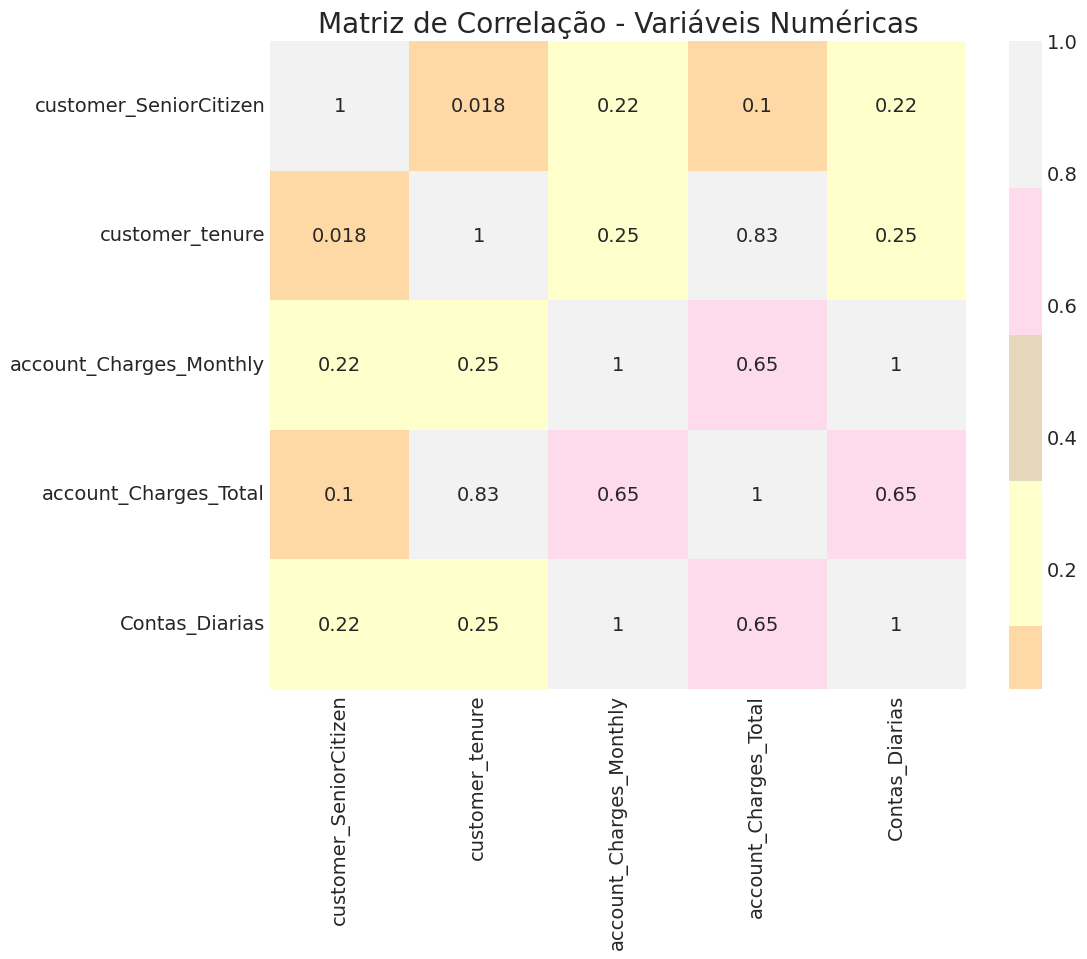

In [147]:
colunas_numericas = df_Telecom.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(10, 8))
sns.heatmap(df_Telecom[colunas_numericas].corr(), annot=True, cmap='Pastel1', center=0)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()



Relatório Final:



Diante da análise do comportamento dos clientes da empresa TelecomX, foi possível identificar os principais fatores que levam à evasão (Churn) e possíveis ações que podem ser aplicadas para reduzir a perda de clientes.

A evasão de clientes, conhecida como Churn, é um dos maiores desafios para empresas do setor de telecomunicações. Clientes que cancelam seus contratos representam uma diminuição de receita e um aumento de recursos para aquisição de novos consumidores. Esta análise busca responder:

▶ "Quais são os principais fatores que impactam a evasão de clientes?"


Durante a exploração dos dados, foram realizados os seguintes passos:

📌 Importação dos Dados: formato CSV/JSON.

📌 Verificação de Tipos de Dados: Conversão de variáveis categóricas, numéricas e tratamento de colunas com tipos incorretos.

📌 Tratamento de Dados Nulos

Realizou-se a remoção.

📌 Correção de Formatos:

Variáveis como TotalCharges foram convertidas de texto para float.

📌 Criação de Novas Variáveis:

Exemplo: cálculo do gasto médio por tempo de contrato (account_Charges_Total/account_tenure) e variáveis auxiliares para análises específicas.

Análise Exploratória de Dados (EDA)

ℹ: Distribuição de Evasão (Churn) Aproximadamente 27% dos clientes cancelaram os serviços, indicando uma taxa de evasão relevante para a empresa.

⭐ Análise por Perfil de Cliente
Clientes com contrato mensal têm a maior taxa de evasão, enquanto contratos anuais ou de dois anos possuem taxas muito menores.

Clientes que não contratam serviços adicionais ou que têm menos serviços são mais propensos a cancelar.

📈 Análise Financeira
Clientes com fatura mensal mais alta tendem a permanecer mais tempo, indicando que clientes de pacotes completos possuem menor chance de evasão.

A correlação entre tempo de contrato (customer_tenure) e gasto total (account_Charges_Total) é muito alta (0.83), o que é esperado — clientes antigos acumularam mais gastos.

💰 Perfil de Evasão
Clientes que usam serviços mensais, têm baixo tempo de contrato e menor gasto acumulado, são os que mais cancelam.

🗺️ Visualizações Destacadas
📌 Gráficos de dispersão mostraram que a evasão se concentra em clientes com baixo tempo de contrato e menor gasto total.

📌 A matriz de correlação.


🏆 Conclusões e Insights

📌 Clientes de contrato mensal são os mais propensos a cancelar.

📌 A longevidade do cliente é fator crucial: clientes antigos têm taxa de evasão muito menor.

📌 Gasto mensal não tem uma correlação direta com o churn, mas o tempo de contrato sim.

📌 Variáveis como SeniorCitizen não possuem impacto relevante no churn.

📌 Observou-se, ainda, que os clientes que utilizam o método de pagamento "Pagamento Eletrônico" apresentam uma taxa de evasão superior à dos demais.



💡 Recomendações

 Incentivar contratos de longo prazo:

Benefícios para os clientes que migrem do contrato mensal para anual ou bienal.

 Oferecer benefícios para novos clientes:

 Programas de fidelização, descontos nos primeiros meses ou serviços bônus.

 Monitoramento proativo:

Implementar alertas para clientes com baixo tempo de contrato e baixo gasto total, que são os mais propensos a cancelar.

 Simplificar os pacotes:

Avaliar se a complexidade dos serviços contribui para o cancelamento.

📜 Resumo Final

A análise identificou que a evasão está fortemente associada ao tempo de contrato. Clientes mais antigos permanecem mais, enquanto clientes novos com contrato mensal ou semanal, não.